In [364]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [365]:
df_gym = pd.read_csv("hietaniemi-gym-data.csv")
df_gym.head()

,time,19,20,21,22,23,24,25,26
0,2020-04-24 00:00:00+00:00,2,2,2,2,2,2,2,2
1,2020-04-24 00:10:00+00:00,2,2,2,2,2,2,2,2
2,2020-04-24 00:20:00+00:00,2,2,2,2,2,2,2,2
3,2020-04-24 00:30:00+00:00,2,2,2,2,2,2,2,2
4,2020-04-24 00:40:00+00:00,2,2,2,2,2,2,2,2


In [366]:
df_weather = pd.read_csv("kaisaniemi-weather-data.csv")
df_weather.head()

,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC)
0,2020,4,24,00:00,UTC,0.0,0.0,6.2
1,2020,4,24,01:00,UTC,0.0,0.0,6.2
2,2020,4,24,02:00,UTC,0.0,0.0,5.1
3,2020,4,24,03:00,UTC,0.0,0.0,4.6
4,2020,4,24,04:00,UTC,0.0,0.0,4.7


In [367]:
# Convert time column into datatime objects
# df_gym['time'] = pd.to_datetime(df_gym['time'])

In [368]:
# df_gym['hour'] = df_gym['time'].dt.floor('H')  # Extract the hour from the timestamp


In [369]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55102 entries, 0 to 55101
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    55102 non-null  object
 1   19      55102 non-null  int64 
 2   20      55102 non-null  int64 
 3   21      55102 non-null  int64 
 4   22      55102 non-null  int64 
 5   23      55102 non-null  int64 
 6   24      55102 non-null  int64 
 7   25      55102 non-null  int64 
 8   26      55102 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 3.8+ MB


In [370]:
df_gym = pd.read_csv('hietaniemi-gym-data.csv')
df_gym.info()
df_gym.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55102 entries, 0 to 55101
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    55102 non-null  object
 1   19      55102 non-null  int64 
 2   20      55102 non-null  int64 
 3   21      55102 non-null  int64 
 4   22      55102 non-null  int64 
 5   23      55102 non-null  int64 
 6   24      55102 non-null  int64 
 7   25      55102 non-null  int64 
 8   26      55102 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 3.8+ MB


,time,19,20,21,22,23,24,25,26
0,2020-04-24 00:00:00+00:00,2,2,2,2,2,2,2,2
1,2020-04-24 00:10:00+00:00,2,2,2,2,2,2,2,2
2,2020-04-24 00:20:00+00:00,2,2,2,2,2,2,2,2
3,2020-04-24 00:30:00+00:00,2,2,2,2,2,2,2,2
4,2020-04-24 00:40:00+00:00,2,2,2,2,2,2,2,2
5,2020-04-24 00:50:00+00:00,2,2,2,2,2,2,2,2
6,2020-04-24 01:00:00+00:00,2,2,2,2,2,2,2,2
7,2020-04-24 01:10:00+00:00,2,2,2,2,2,2,2,2
8,2020-04-24 01:20:00+00:00,2,2,2,2,2,2,2,2
9,2020-04-24 01:30:00+00:00,2,2,2,2,2,2,2,2


* There are 55102 Entries 
* Date ranges from 2020-04-24 to 2021-05-11

In [371]:
# Convert 'time' column to datetime
df_gym['time'] = pd.to_datetime(df_gym['time'])

# Set 'time' column as index
df_gym.set_index('time', inplace=True)

In [372]:
# Resample data to hourly frequency and sum
hourly_sum = df_gym.resample('h').sum()
hourly_sum.head(10)

,19,20,21,22,23,24,25,26
time,,,,,,,,
2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12
2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12
2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13
2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20
2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28
2020-04-24 05:00:00+00:00,19,15,18,12,19,20,28,18
2020-04-24 06:00:00+00:00,36,28,34,25,28,30,30,34
2020-04-24 07:00:00+00:00,28,26,24,22,26,31,26,26
2020-04-24 08:00:00+00:00,32,25,25,21,34,30,44,33


In [373]:
df_dummy = hourly_sum.copy()
df_dummy['hour'] = df_dummy.index.time
df_dummy['day'] = df_dummy.index.day
df_dummy['month'] = df_dummy.index.month
df_dummy['year'] = df_dummy.index.year 



df_dummy.head()

,19,20,21,22,23,24,25,26,hour,day,month,year
time,,,,,,,,,,,,
2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12,00:00:00,24,4,2020
2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12,01:00:00,24,4,2020
2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13,02:00:00,24,4,2020
2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20,03:00:00,24,4,2020
2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28,04:00:00,24,4,2020


In [374]:
# Converting 'hour' column to string and extract hour part
df_dummy['hour'] = df_dummy.index.strftime('%H')
df_dummy.head()

,19,20,21,22,23,24,25,26,hour,day,month,year
time,,,,,,,,,,,,
2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12,00,24,4,2020
2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12,01,24,4,2020
2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13,02,24,4,2020
2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20,03,24,4,2020
2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28,04,24,4,2020


/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

<Axes: xlabel='day', ylabel='19'>

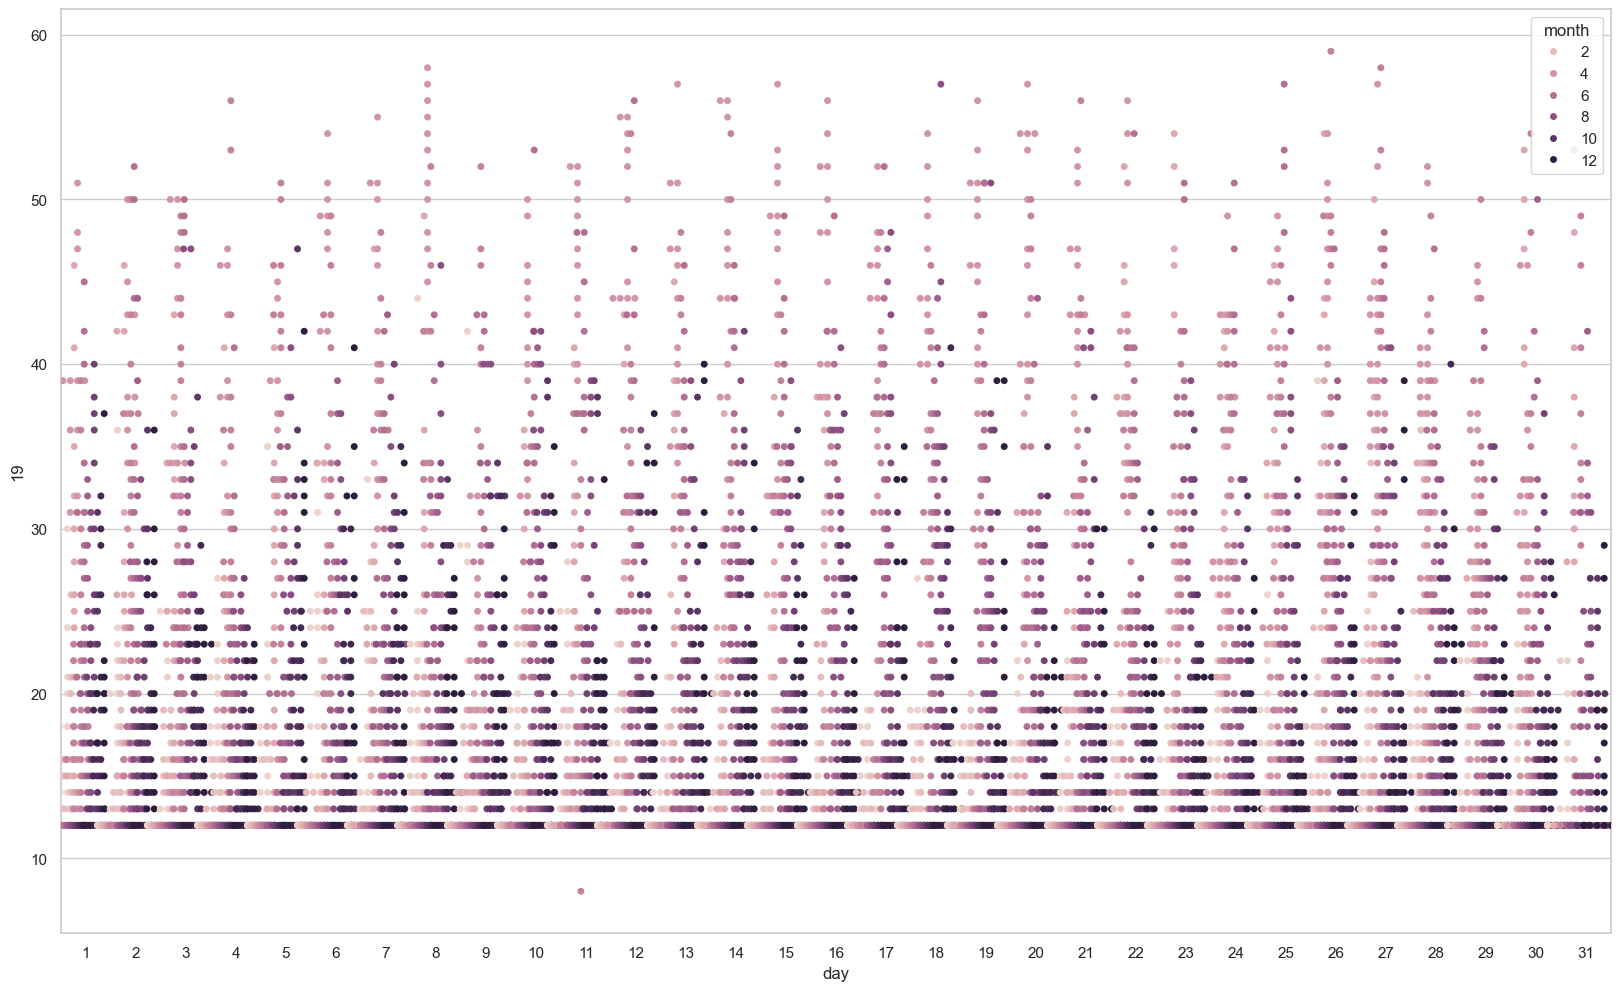

In [375]:
plt.figure(figsize=(20, 12))

sns.swarmplot(data=df_dummy, x="day", y="19", hue="month", dodge=True)

/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 95.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

<Figure size 2000x1200 with 0 Axes>

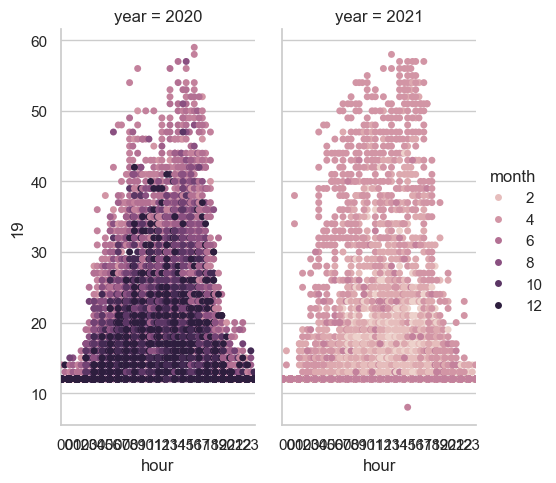

In [376]:
plt.figure(figsize=(20, 12))

sns.catplot(
    data=df_dummy, kind="swarm",
    x="hour", y="19", hue="month", col="year",
    aspect=.5
)

<Axes: xlabel='hour', ylabel='19'>

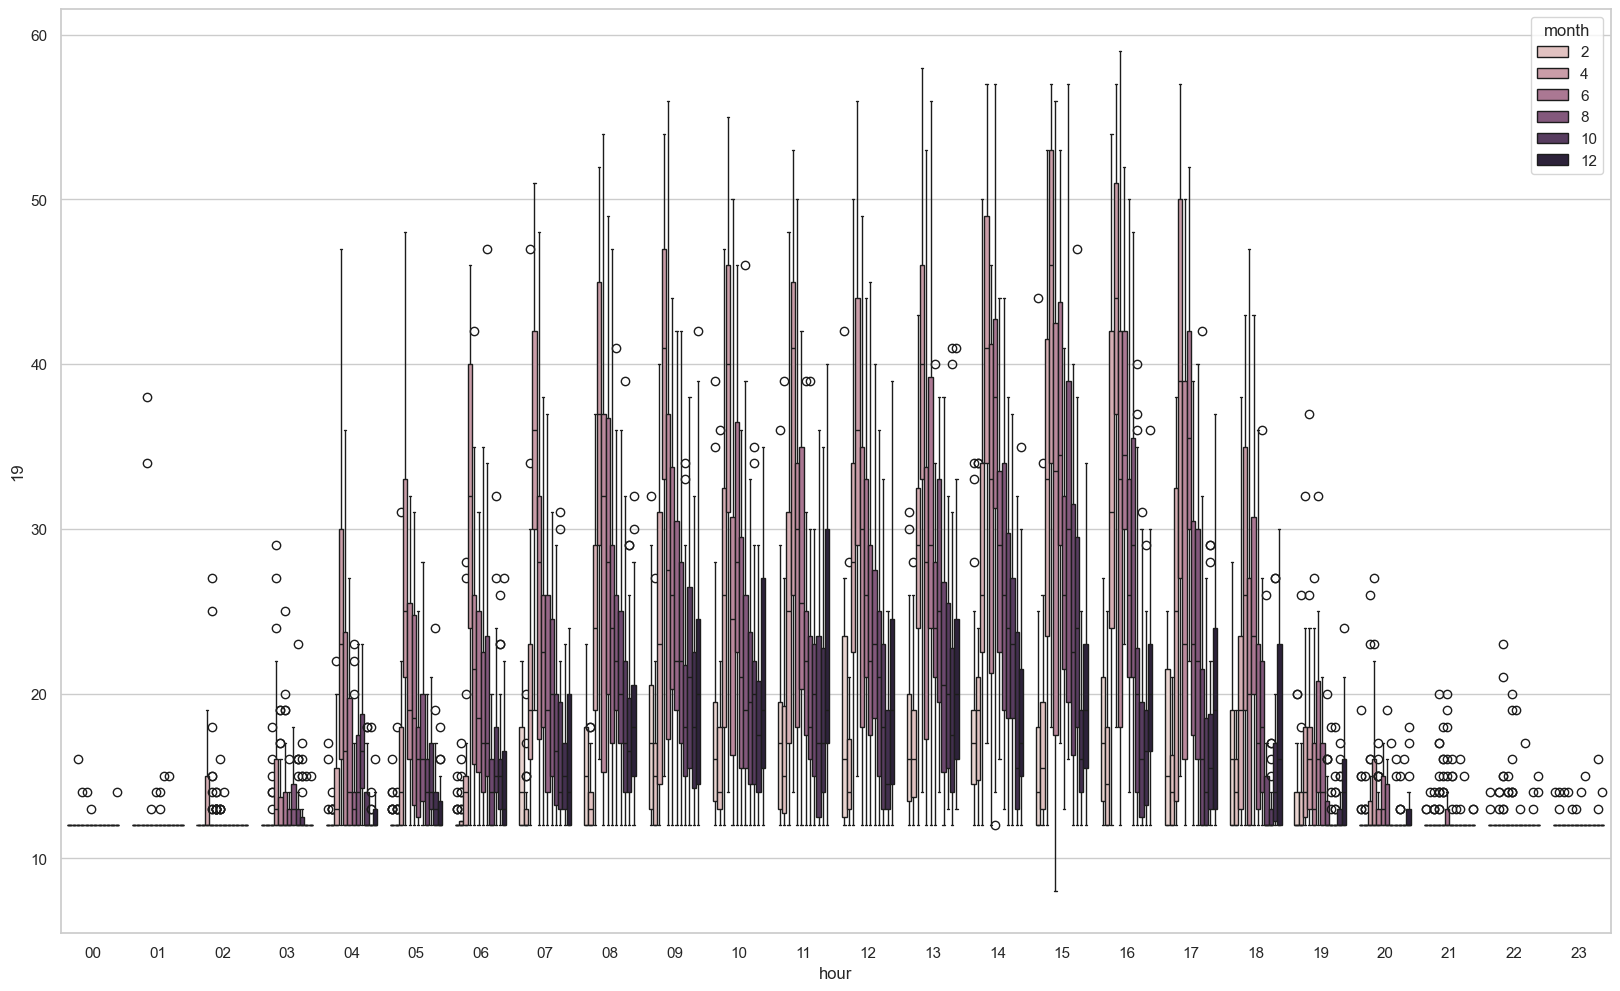

In [411]:
plt.figure(figsize=(20, 12))

sns.boxplot(data=df_dummy, x="hour", y="19", hue="month")

In [378]:
df_dummy2 = df_dummy[['19', '20', '21', '22', '23', '24', '25','26', 'day']]

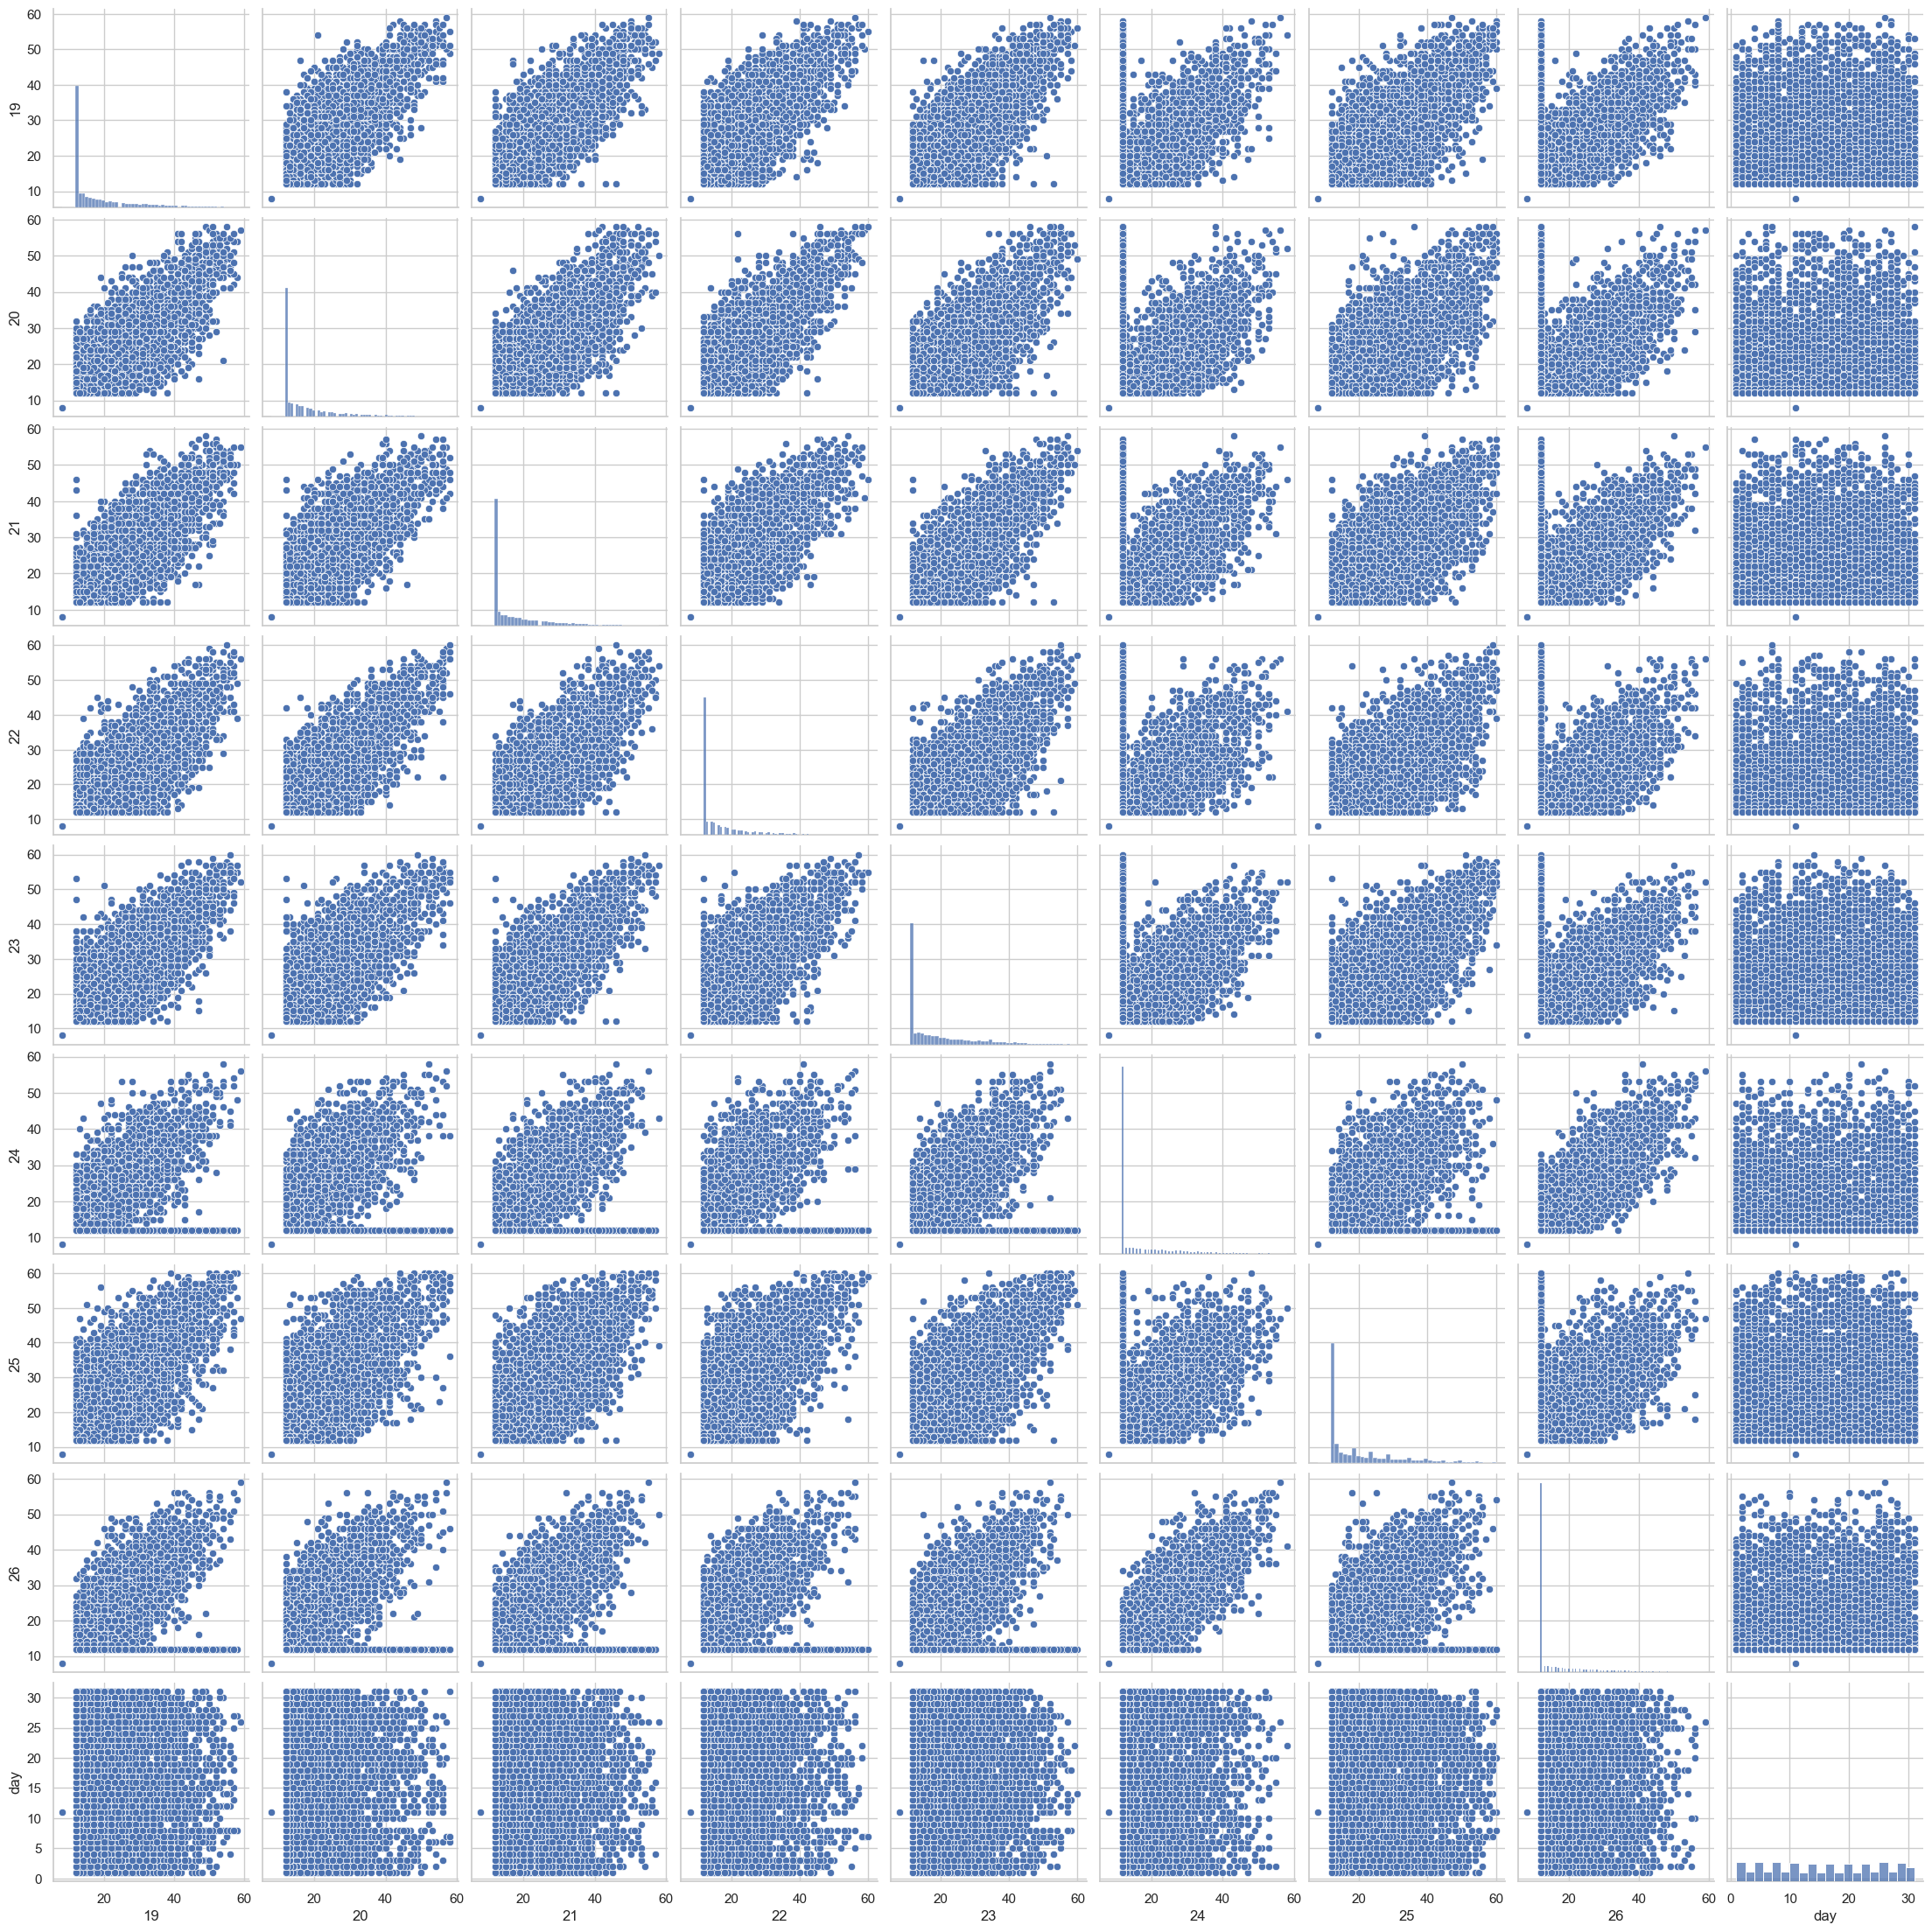

In [379]:
sns.pairplot(df_dummy2)

<Figure size 2000x1200 with 0 Axes>

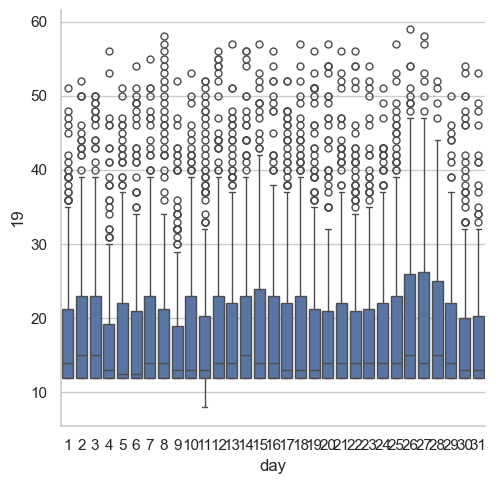

In [380]:
plt.figure(figsize=(20, 12))
sns.catplot(data=df_dummy2, x="day", y="19", kind="box")

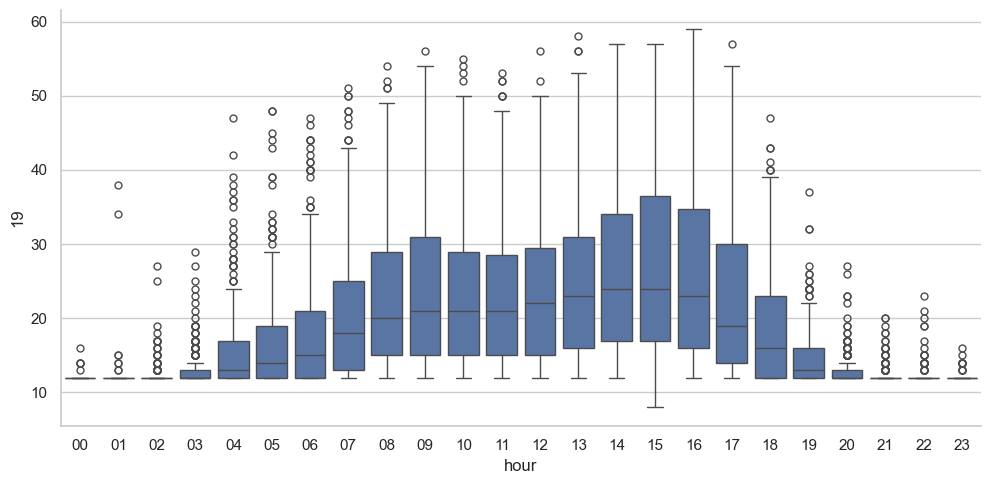

In [381]:
sns.catplot(data=df_dummy, x="hour", y="19", kind="box", height=5, aspect=2)
plt.show()

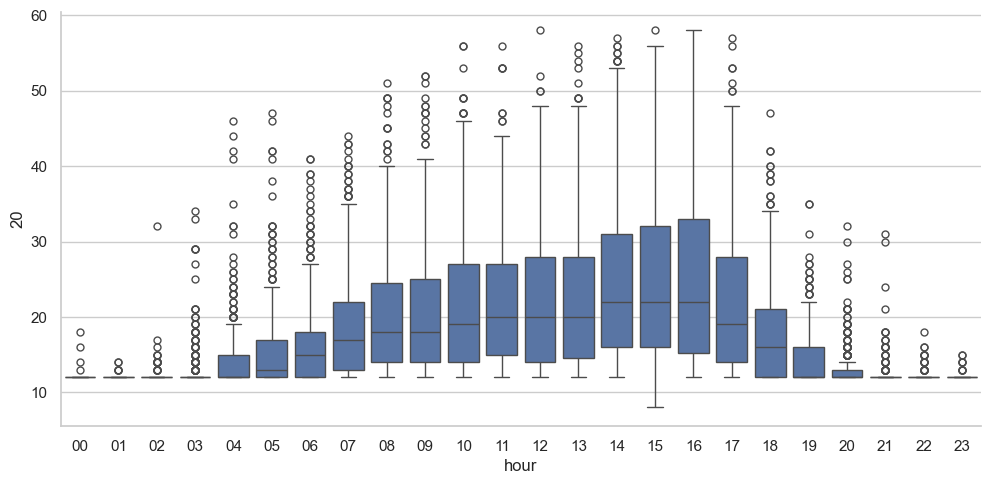

In [382]:
sns.catplot(data=df_dummy, x="hour", y="20", kind="box", height=5, aspect=2)

plt.show()

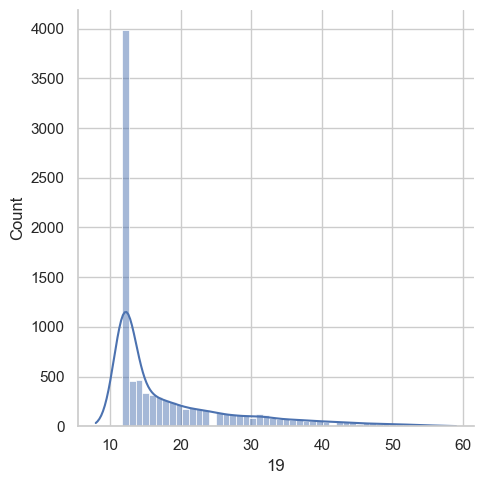

In [383]:
sns.displot(data=hourly_sum, x="19", kde=True)

In [384]:
# Task 2: Check number of rows, date range, and if all numerical values are positive
num_rows = df_gym.shape[0]
date_range = (df_gym.index.min(), df_gym.index.max())
all_positive = (df_gym >= 0).all().all()

print("Task 2: Number of Rows, Date Range, All Values Positive")
print("Number of Rows:", num_rows)
print("Date Range:", date_range)
print("All Values Positive:", all_positive)

Task 2: Number of Rows, Date Range, All Values Positive
Number of Rows: 55102
Date Range: (Timestamp('2020-04-24 00:00:00+0000', tz='UTC'), Timestamp('2021-05-11 15:30:00+0000', tz='UTC'))
All Values Positive: True


In [385]:
hourly_sum.head()

,19,20,21,22,23,24,25,26
time,,,,,,,,
2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12
2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12
2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13
2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20
2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28


In [386]:
hourly_sum.dtypes

19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
dtype: object

In [387]:
# Task 3: Find the most popular device, analyze time of day, and day of week
most_popular_device = hourly_sum.sum().idxmax()
hourly_sum['hour'] = hourly_sum.index.hour
hourly_sum['day_of_week'] = hourly_sum.index.dayofweek
time_of_day_analysis = hourly_sum.groupby('hour').sum()
day_of_week_analysis = hourly_sum.groupby('day_of_week').sum()

print("Task 3: Most Popular Device, Time of Day Analysis, Day of Week Analysis")
print("Most Popular Device:", most_popular_device)
print("Time of Day Analysis:")
print(time_of_day_analysis)
#print("Day of Week Analysis:")
#print(day_of_week_analysis)

Task 3: Most Popular Device, Time of Day Analysis, Day of Week Analysis
Most Popular Device: 25
Time of Day Analysis:
         19    20     21    22     23    24     25    26  day_of_week
hour                                                                 
0      4607  4609   4613  4606   4616  4603   4614  4598         1150
1      4656  4604   4700  4604   4680  4597   4705  4598         1150
2      4706  4658   4712  4627   4817  4641   4757  4637         1150
3      4961  4976   5043  4906   5081  4936   5058  4916         1150
4      5895  5514   5771  5481   6164  5541   6349  5556         1150
5      6368  5972   6106  5884   6417  5839   6960  5847         1150
6      6945  6323   6769  6248   6967  6234   7659  6055         1150
7      7806  7161   7442  6870   7953  6825   8362  6631         1150
8      8769  7791   8286  7861   8697  7118   9256  7018         1150
9      9090  8012   8737  8141   9060  7330   9637  7301         1150
10     8910  8514   8793  8106   9055  727

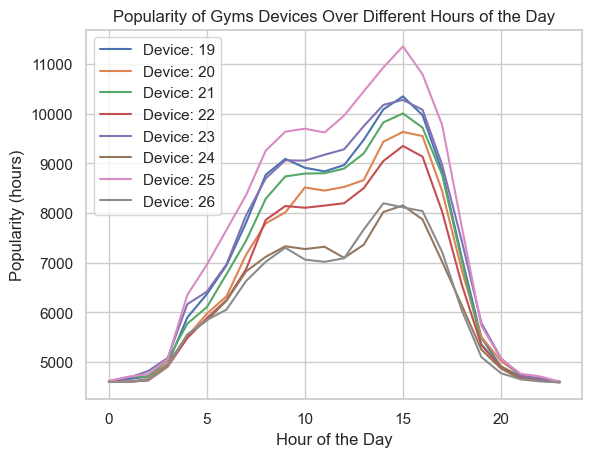

In [388]:
# Plot each item separately
for column in time_of_day_analysis.columns[:-1]:  # Exclude 'day_of_week'
    plt.plot(time_of_day_analysis.index, time_of_day_analysis[column], label=f'Device: {column}')

plt.xlabel('Hour of the Day')
plt.ylabel('Popularity (hours)')
plt.title('Popularity of Gyms Devices Over Different Hours of the Day')
plt.legend()
plt.grid(True)

plt.show()


In [389]:
print("Day of Week Analysis:")
print(day_of_week_analysis)

Day of Week Analysis:
                19     20     21     22     23     24     25     26   hour
day_of_week                                                               
0            25404  23750  24848  23098  25956  21488  27377  21636  15180
1            24946  23726  24305  23247  25444  21427  26633  21389  15024
2            24378  23233  23895  22850  24980  21249  26181  21200  14904
3            23866  22645  23499  22333  24385  20891  25727  20982  14904
4            24036  22470  23462  22263  24151  21351  25569  21091  15180
5            23667  22728  23279  21740  23804  20250  25096  20101  15180
6            24418  23625  24155  22905  24796  21252  25949  20924  15180


In [390]:
# Sum of numbers across all gym devices 
print("Task 4: Sum of Minutes")
df_dummy.sum()

Task 4: Sum of Minutes


19                                                  170715
20                                                  162177
21                                                  167443
22                                                  158436
23                                                  173516
24                                                  147908
25                                                  182532
26                                                  147323
hour     0001020304050607080910111213141516171819202122...
day                                                 143744
month                                                59120
year                                              18554816
dtype: object

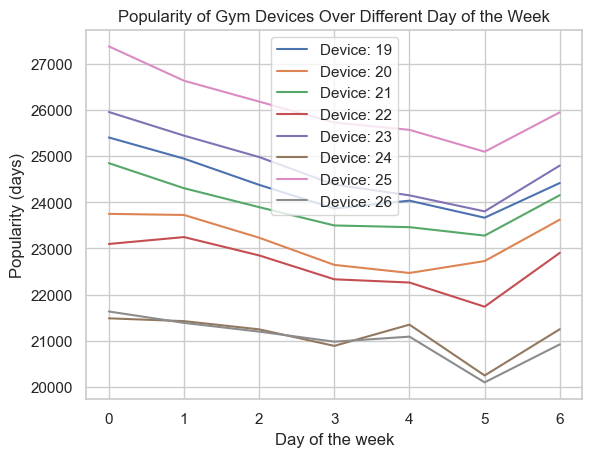

In [391]:
# Plot each item separately
for column in day_of_week_analysis.columns[:-1]:  # Exclude 'hour'
    plt.plot(day_of_week_analysis.index, day_of_week_analysis[column], label=f'Device: {column}')

plt.xlabel('Day of the week')
plt.ylabel('Popularity (days)')
plt.title('Popularity of Gym Devices Over Different Day of the Week')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [392]:
# Task 5: Read weather data and merge with gym data for analysis
weather_df = pd.read_csv('kaisaniemi-weather-data.csv')  
merged_data = hourly_sum.merge(weather_df, left_index=True, right_index=True)

In [393]:
hourly_sum.head()

,19,20,21,22,23,24,25,26,hour,day_of_week
time,,,,,,,,,,
2020-04-24 00:00:00+00:00,12,12,12,12,12,12,12,12,0,4
2020-04-24 01:00:00+00:00,12,12,12,12,12,12,12,12,1,4
2020-04-24 02:00:00+00:00,12,12,12,14,12,13,12,13,2,4
2020-04-24 03:00:00+00:00,13,14,15,12,18,20,23,20,3,4
2020-04-24 04:00:00+00:00,24,15,23,24,19,25,30,28,4,4


In [394]:
df_weather.head()

,Year,Month,Day,Hour,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC)
0,2020,4,24,00:00,UTC,0.0,0.0,6.2
1,2020,4,24,01:00,UTC,0.0,0.0,6.2
2,2020,4,24,02:00,UTC,0.0,0.0,5.1
3,2020,4,24,03:00,UTC,0.0,0.0,4.6
4,2020,4,24,04:00,UTC,0.0,0.0,4.7


In [395]:
df_weather['Hour'] = df_weather['Hour'].astype(str)

df_weather['datetime'] = pd.to_datetime(df_weather['Year'].astype(str) + '-' +
                                df_weather['Month'].astype(str) + '-' +
                                df_weather['Day'].astype(str) + ' ' +
                                df_weather['Hour']).astype('object')

df_weather_datetime = df_weather.drop(columns=['Year', 'Month', 'Day', 'Hour'])

df_weather_datetime.head()

,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),datetime
0,UTC,0.0,0.0,6.2,2020-04-24 00:00:00
1,UTC,0.0,0.0,6.2,2020-04-24 01:00:00
2,UTC,0.0,0.0,5.1,2020-04-24 02:00:00
3,UTC,0.0,0.0,4.6,2020-04-24 03:00:00
4,UTC,0.0,0.0,4.7,2020-04-24 04:00:00


In [396]:
hourly_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9184 entries, 2020-04-24 00:00:00+00:00 to 2021-05-11 15:00:00+00:00
Freq: h
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   19           9184 non-null   int64
 1   20           9184 non-null   int64
 2   21           9184 non-null   int64
 3   22           9184 non-null   int64
 4   23           9184 non-null   int64
 5   24           9184 non-null   int64
 6   25           9184 non-null   int64
 7   26           9184 non-null   int64
 8   hour         9184 non-null   int32
 9   day_of_week  9184 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 717.5 KB


In [397]:
hourly_sum.reset_index(inplace=True)
hourly_sum['time'] = pd.to_datetime(hourly_sum['time']).dt.strftime('%Y-%m-%d %H:%M:%S')
hourly_sum.head()

,time,19,20,21,22,23,24,25,26,hour,day_of_week
0,2020-04-24 00:00:00,12,12,12,12,12,12,12,12,0,4
1,2020-04-24 01:00:00,12,12,12,12,12,12,12,12,1,4
2,2020-04-24 02:00:00,12,12,12,14,12,13,12,13,2,4
3,2020-04-24 03:00:00,13,14,15,12,18,20,23,20,3,4
4,2020-04-24 04:00:00,24,15,23,24,19,25,30,28,4,4


In [398]:
hourly_sum.dtypes

time           object
19              int64
20              int64
21              int64
22              int64
23              int64
24              int64
25              int64
26              int64
hour            int32
day_of_week     int32
dtype: object

In [399]:
df_weather_datetime.dtypes

Timezone               object
Precipitation (mm)    float64
Snow depth (cm)       float64
Temperature (degC)    float64
datetime               object
dtype: object

In [400]:
hourly_sum['time'] = pd.to_datetime(hourly_sum['time'])

In [401]:
df_weather_datetime['datetime'] = pd.to_datetime(df_weather_datetime['datetime'])


In [402]:
merged_df = hourly_sum.merge(df_weather_datetime, left_on='time', right_on='datetime')
merged_df.head()

,time,19,20,21,22,23,24,25,26,hour,day_of_week,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),datetime
0,2020-04-24 00:00:00,12,12,12,12,12,12,12,12,0,4,UTC,0.0,0.0,6.2,2020-04-24 00:00:00
1,2020-04-24 01:00:00,12,12,12,12,12,12,12,12,1,4,UTC,0.0,0.0,6.2,2020-04-24 01:00:00
2,2020-04-24 02:00:00,12,12,12,14,12,13,12,13,2,4,UTC,0.0,0.0,5.1,2020-04-24 02:00:00
3,2020-04-24 03:00:00,13,14,15,12,18,20,23,20,3,4,UTC,0.0,0.0,4.6,2020-04-24 03:00:00
4,2020-04-24 04:00:00,24,15,23,24,19,25,30,28,4,4,UTC,0.0,0.0,4.7,2020-04-24 04:00:00


In [403]:
merged_df = merged_df.drop(columns='datetime')
merged_df.head()


,time,19,20,21,22,23,24,25,26,hour,day_of_week,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC)
0,2020-04-24 00:00:00,12,12,12,12,12,12,12,12,0,4,UTC,0.0,0.0,6.2
1,2020-04-24 01:00:00,12,12,12,12,12,12,12,12,1,4,UTC,0.0,0.0,6.2
2,2020-04-24 02:00:00,12,12,12,14,12,13,12,13,2,4,UTC,0.0,0.0,5.1
3,2020-04-24 03:00:00,13,14,15,12,18,20,23,20,3,4,UTC,0.0,0.0,4.6
4,2020-04-24 04:00:00,24,15,23,24,19,25,30,28,4,4,UTC,0.0,0.0,4.7


In [404]:
merged_df.head()


,time,19,20,21,22,23,24,25,26,hour,day_of_week,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC)
0,2020-04-24 00:00:00,12,12,12,12,12,12,12,12,0,4,UTC,0.0,0.0,6.2
1,2020-04-24 01:00:00,12,12,12,12,12,12,12,12,1,4,UTC,0.0,0.0,6.2
2,2020-04-24 02:00:00,12,12,12,14,12,13,12,13,2,4,UTC,0.0,0.0,5.1
3,2020-04-24 03:00:00,13,14,15,12,18,20,23,20,3,4,UTC,0.0,0.0,4.6
4,2020-04-24 04:00:00,24,15,23,24,19,25,30,28,4,4,UTC,0.0,0.0,4.7


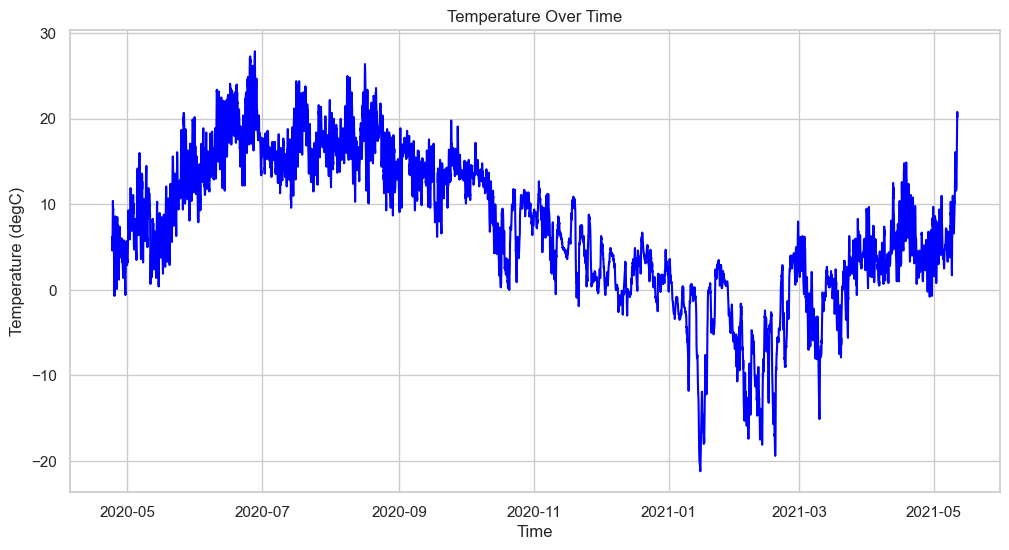

In [405]:
# Assuming df is your DataFrame
sns.set(style="whitegrid") # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=merged_df, x='time', y='Temperature (degC)', color='blue')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature Over Time')

plt.show()


/var/folders/72/q42hyhx16xj2zjy00d3ks2yh0000gn/T/ipykernel_19759/1956282950.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Temperature (degC)'] = merged_df['Temperature (degC)'].fillna(method='ffill')


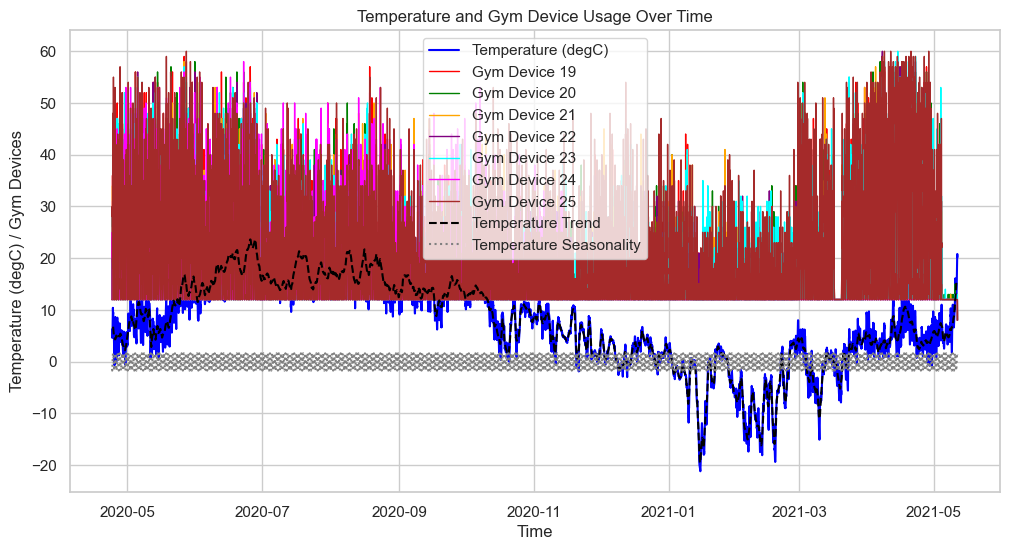

In [406]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

merged_df['Temperature (degC)'] = merged_df['Temperature (degC)'].fillna(method='ffill')

colors = ['red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown']

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the temperature data
ax1.plot(merged_df['time'], merged_df['Temperature (degC)'], color='blue', label='Temperature (degC)')

for i in range(19, 26):
    ax1.plot(merged_df['time'], merged_df[str(i)], color=colors[i-19], label=f'Gym Device {i}', linewidth=1)

decomposition = sm.tsa.seasonal_decompose(merged_df['Temperature (degC)'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
ax1.plot(merged_df['time'], trend, color='black', linestyle='--', label='Temperature Trend')
ax1.plot(merged_df['time'], seasonal, color='gray', linestyle=':', label='Temperature Seasonality')

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (degC) / Gym Devices')
ax1.set_title('Temperature and Gym Device Usage Over Time')
ax1.legend()

plt.show()


In [407]:
merged_df['Date'] = merged_df['time'].dt.date
merged_df['Week'] = merged_df['time'].dt.isocalendar().week
merged_df.head()

,time,19,20,21,22,23,24,25,26,hour,day_of_week,Timezone,Precipitation (mm),Snow depth (cm),Temperature (degC),Date,Week
0,2020-04-24 00:00:00,12,12,12,12,12,12,12,12,0,4,UTC,0.0,0.0,6.2,2020-04-24,17
1,2020-04-24 01:00:00,12,12,12,12,12,12,12,12,1,4,UTC,0.0,0.0,6.2,2020-04-24,17
2,2020-04-24 02:00:00,12,12,12,14,12,13,12,13,2,4,UTC,0.0,0.0,5.1,2020-04-24,17
3,2020-04-24 03:00:00,13,14,15,12,18,20,23,20,3,4,UTC,0.0,0.0,4.6,2020-04-24,17
4,2020-04-24 04:00:00,24,15,23,24,19,25,30,28,4,4,UTC,0.0,0.0,4.7,2020-04-24,17


In [408]:
most_popular_device = hourly_sum.sum().idxmax()
hourly_sum['hour'] = hourly_sum.index.hour
hourly_sum['day_of_week'] = hourly_sum.index.dayofweek
time_of_day_analysis = hourly_sum.groupby('hour').sum()
day_of_week_analysis = hourly_sum.groupby('day_of_week').sum()

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [ ]:
merged_df['Temperature (degC)'].min()

-21.2

In [ ]:
# Analyze impact of temperature on gym popularity
temp_vs_popularity = merged_data.groupby(pd.cut(merged_data['Temperature (degC)'], bins=[-10, 0, 10, 20, 30, 40])).mean()

# Analyze impact of precipitation on gym popularity
precip_vs_popularity = merged_data.groupby(pd.cut(merged_data['Precipitation (mm)'], bins=[-2, 0, 5, 10, 20, 50])).mean()

# Display results
print("Temperature vs Gym Popularity:")
print(temp_vs_popularity[['19', '20', '21', '22', '23', '24', '25', '26']])
print("Precipitation vs Gym Popularity:")
print(precip_vs_popularity[['19', '20', '21', '22', '23', '24', '25', '26']])

Temperature vs Gym Popularity:
                    19  20  21  22  23  24  25  26
Temperature (degC)                                
(-10, 0]           NaN NaN NaN NaN NaN NaN NaN NaN
(0, 10]            NaN NaN NaN NaN NaN NaN NaN NaN
(10, 20]           NaN NaN NaN NaN NaN NaN NaN NaN
(20, 30]           NaN NaN NaN NaN NaN NaN NaN NaN
(30, 40]           NaN NaN NaN NaN NaN NaN NaN NaN

Precipitation vs Gym Popularity:
                    19  20  21  22  23  24  25  26
Precipitation (mm)                                
(-2, 0]            NaN NaN NaN NaN NaN NaN NaN NaN
(0, 5]             NaN NaN NaN NaN NaN NaN NaN NaN
(5, 10]            NaN NaN NaN NaN NaN NaN NaN NaN
(10, 20]           NaN NaN NaN NaN NaN NaN NaN NaN
(20, 50]           NaN NaN NaN NaN NaN NaN NaN NaN


/var/folders/72/q42hyhx16xj2zjy00d3ks2yh0000gn/T/ipykernel_19759/587867553.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_vs_popularity = merged_data.groupby(pd.cut(merged_data['Temperature (degC)'], bins=[-10, 0, 10, 20, 30, 40])).mean()
/var/folders/72/q42hyhx16xj2zjy00d3ks2yh0000gn/T/ipykernel_19759/587867553.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_vs_popularity = merged_data.groupby(pd.cut(merged_data['Precipitation (mm)'], bins=[-2, 0, 5, 10, 20, 50])).mean()


In [ ]:
merged_df.dtypes

time                  datetime64[ns]
19                             int64
20                             int64
21                             int64
22                             int64
23                             int64
24                             int64
25                             int64
26                             int64
Timezone                      object
Precipitation (mm)           float64
Snow depth (cm)              float64
Temperature (degC)           float64
Date                          object
Week                          UInt32
dtype: object

## Bonus Task

In [ ]:
import pickle

# Open the pickle file for reading in binary mode ('rb')
with open('model.pkl', 'rb') as f:
    # Load the object from the file
    loaded_object = pickle.load(f)
print(loaded_object)


['weekday' 'hour' 'Precipitation (mm)' 'Snow depth (cm)'
 'Temperature (degC)']


In [414]:
type(loaded_object)

numpy.ndarray

In [417]:
print(loaded_object)

['weekday' 'hour' 'Precipitation (mm)' 'Snow depth (cm)'
 'Temperature (degC)']


In [ ]:

merged_df['time'] = pd.to_datetime(merged_df['time'])  
merged_df['weekday'] = merged_df['time'].dt.dayofweek  
merged_df['hour'] = merged_df['time'].dt.hour  

# Required columns
features_df = merged_df[['weekday', 'hour', 'Precipitation (mm)', 'Snow depth (cm)', 'Temperature (degC)']]

prepared_df = features_df.copy()

prepared_df.columns = ['Weekday', 'Hour', 'Precipitation (mm)', 'Snow depth (cm)', 'Temperature (degC)']

print(prepared_df.head())


   Weekday  Hour  Precipitation (mm)  Snow depth (cm)  Temperature (degC)
0        4     0                 0.0              0.0                 6.2
1        4     1                 0.0              0.0                 6.2
2        4     2                 0.0              0.0                 5.1
3        4     3                 0.0              0.0                 4.6
4        4     4                 0.0              0.0                 4.7


In [ ]:
import joblib

# Load the pretrained model
with open("model.pkl", "rb") as f:
    model = joblib.load(f)

if hasattr(model, 'predict'):
    prepared_df['predictions'] = model.predict(prepared_df)
else:
    print("Error: Loaded model does not have a 'predict' method.")


/Users/sargupta/Desktop/GenAI/norway/.venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  try:


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Hour
- Weekday
Feature names seen at fit time, yet now missing:
- hour
- weekday
